In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score , roc_curve
)

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [45]:
df = pd.read_csv(r"C:\Users\Chinna Joka\Downloads\Paper+Dataset\bank.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [46]:
df.shape

(41188, 21)

In [47]:
df['y'] = df['y'].map({'yes':1,'no':0})

In [48]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [49]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   

In [50]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [51]:
df.duplicated().sum()

np.int64(12)

In [52]:
df.drop_duplicates(inplace=True)

In [53]:
df.shape

(41176, 21)

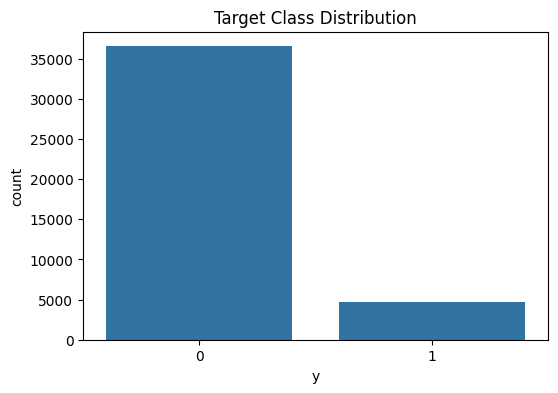

y
0    0.887337
1    0.112663
Name: proportion, dtype: float64


In [54]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="y")
plt.title("Target Class Distribution")
plt.show()

print(df["y"].value_counts(normalize=True))

In [55]:
numeric_features = df.select_dtypes(include=['number']).columns
print(f"Numerical Features Count : {numeric_features.shape[0]}")
print(numeric_features)
df[numeric_features].describe()

Numerical Features Count : 11
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


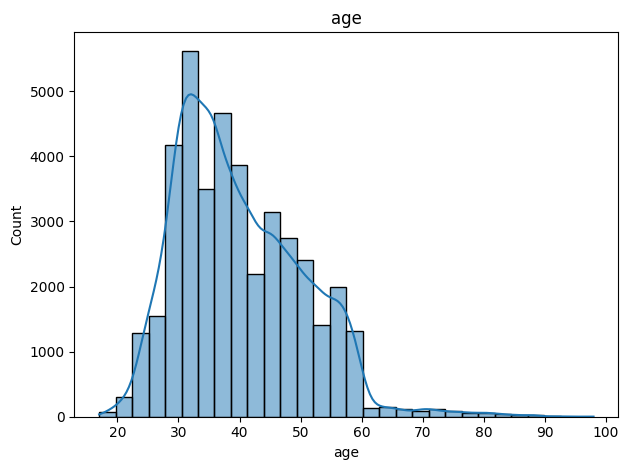

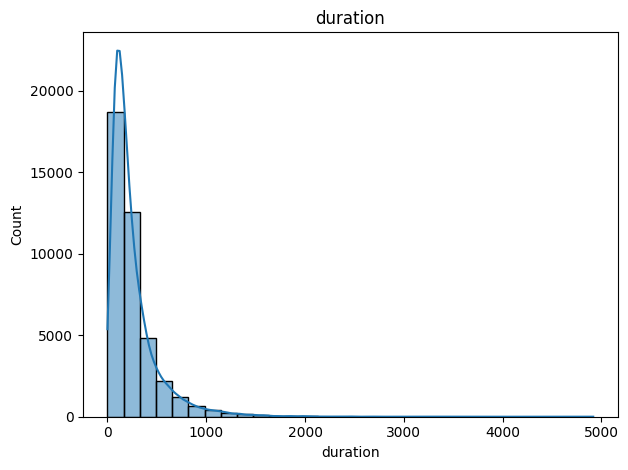

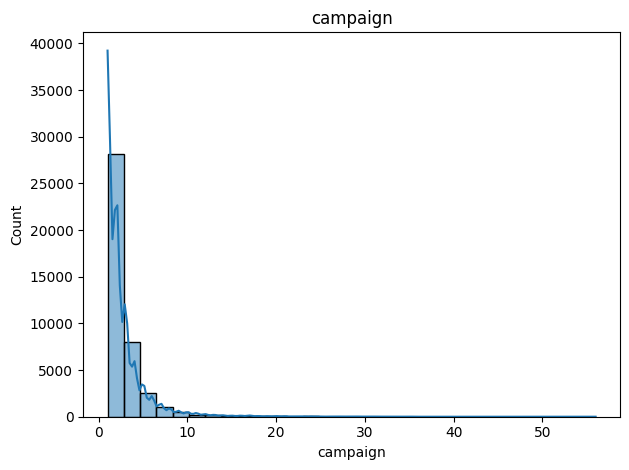

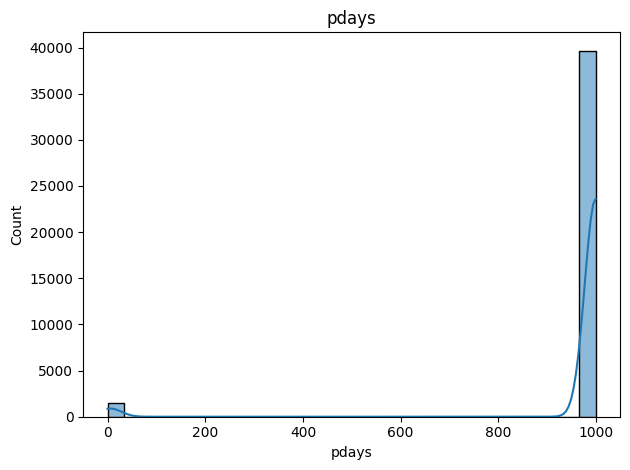

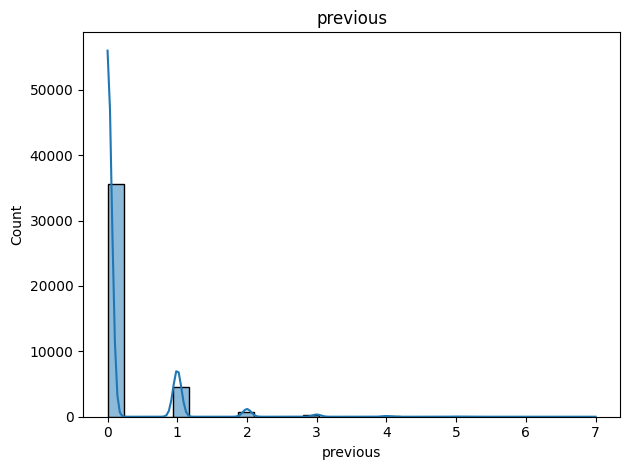

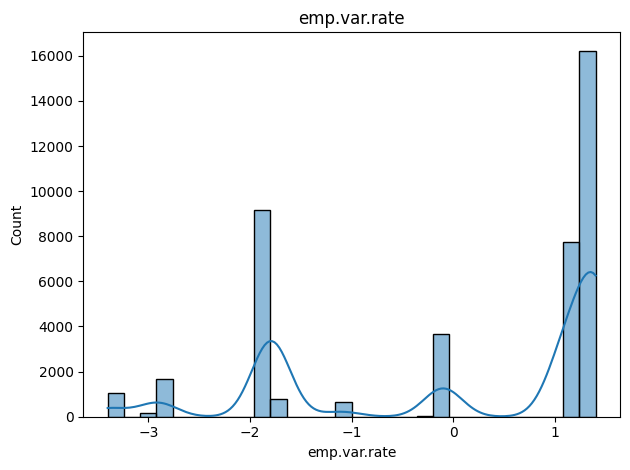

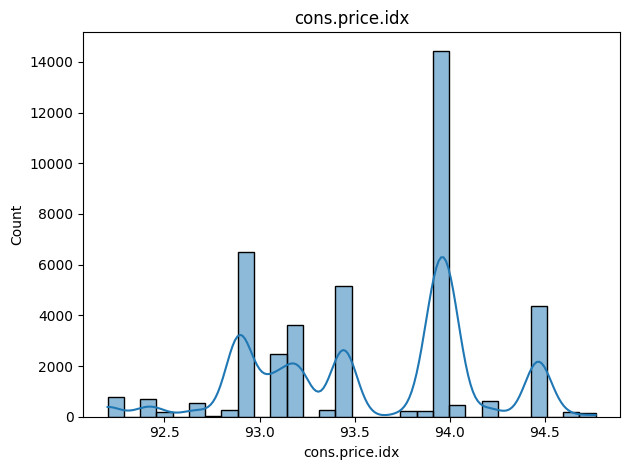

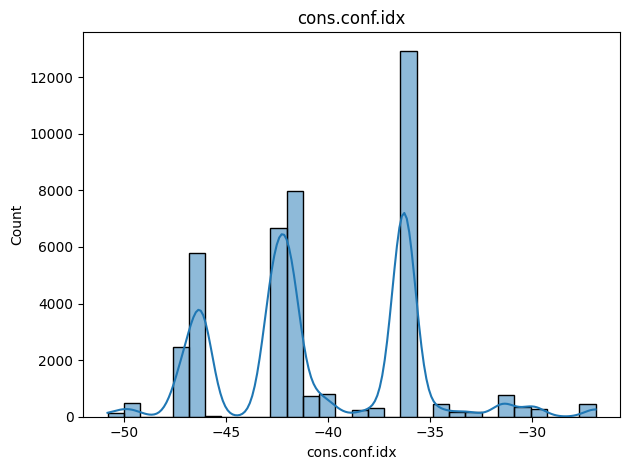

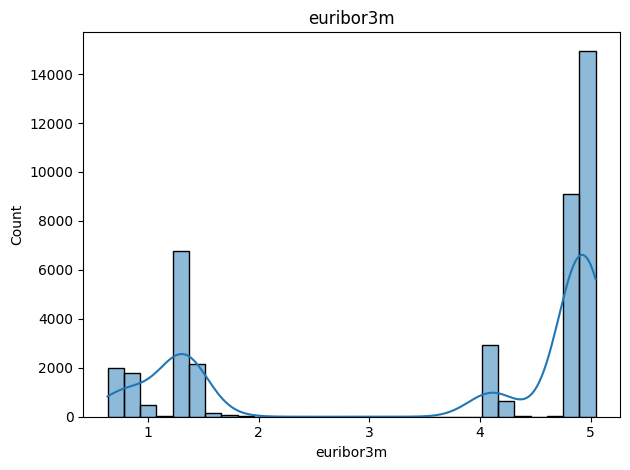

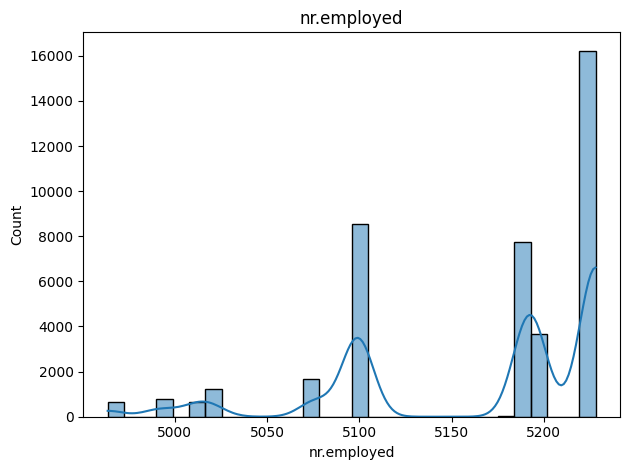

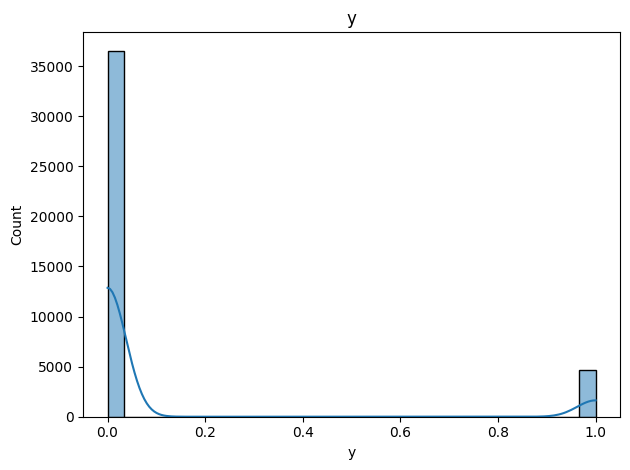

In [56]:
for col in numeric_features:
    sns.histplot(data=df[col] , kde= True , bins=30)
    plt.title(col)
    plt.tight_layout()
    plt.show()

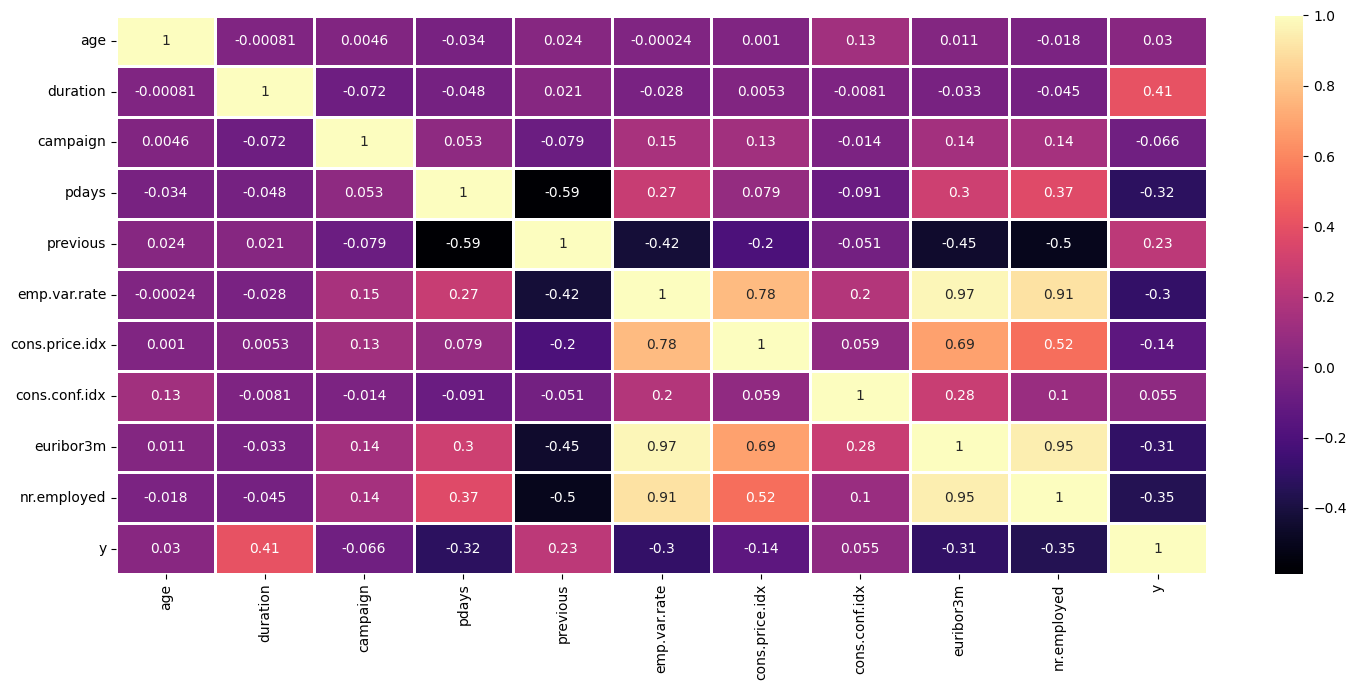

In [57]:
plt.figure(figsize=(15,7))
sns.heatmap(data=df.corr(numeric_only=True) , annot=True , linewidths= 1 , cmap='magma')
plt.tight_layout()
plt.show()

In [58]:
#   VARIANCE INFLATION FACTOR 
x = df.drop('y' , axis=1)
x = x.select_dtypes(include=['number'])

VIF = pd.DataFrame()
VIF['Features'] = x.columns
VIF['Values'] = [variance_inflation_factor(x.values , i) for i in range(x.shape[1])]
VIF.sort_values(by='Values' , ascending=False)

,Features,Values
9,nr.employed,26743.400836
6,cons.price.idx,22558.159811
8,euribor3m,226.220791
7,cons.conf.idx,120.096263
3,pdays,44.400563
5,emp.var.rate,28.906692
0,age,16.047407
1,duration,2.011088
4,previous,2.001611
2,campaign,1.921537


In [59]:
df = df.drop(columns=['nr.employed' , 'cons.price.idx'] , axis= 1 , errors='ignore')

In [60]:
df.shape

(41176, 19)

In [61]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'euribor3m',
       'y'],
      dtype='object')

In [62]:
X = df.drop('y' , axis=1)
Y = df['y']

In [63]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'euribor3m'],
      dtype='object')

In [64]:
Y.value_counts()

y
0    36537
1     4639
Name: count, dtype: int64

In [65]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.2 , stratify=Y)

In [66]:
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X_train.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
    ]
)

In [67]:
preprocessor.fit(X)

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,feature_range,"(0, ...)"
,copy,True
,clip,False


In [68]:
model_core_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", LogisticRegression(solver = "liblinear" , max_iter=1000 , penalty="l1"))
])

In [69]:
model_core_pipeline.fit(X_train, Y_train)


,steps,"[('preprocess', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [70]:
Y_pred = model_core_pipeline.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(8236,))

In [71]:
print("\nModel Evaluation:")
print("-"*50)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC AUC:", roc_auc_score(Y_test, Y_pred))


Model Evaluation:
--------------------------------------------------
Accuracy: 0.8635259834871297
Precision: 0.44561598224195337
Recall: 0.865301724137931
F1 Score: 0.5882783882783883
ROC AUC: 0.8643011083743842


In [72]:
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7308
           1       0.45      0.87      0.59       928

    accuracy                           0.86      8236
   macro avg       0.71      0.86      0.75      8236
weighted avg       0.92      0.86      0.88      8236



In [73]:
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))


Confusion Matrix:
[[6309  999]
 [ 125  803]]


In [74]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[6309  999]
 [ 125  803]]


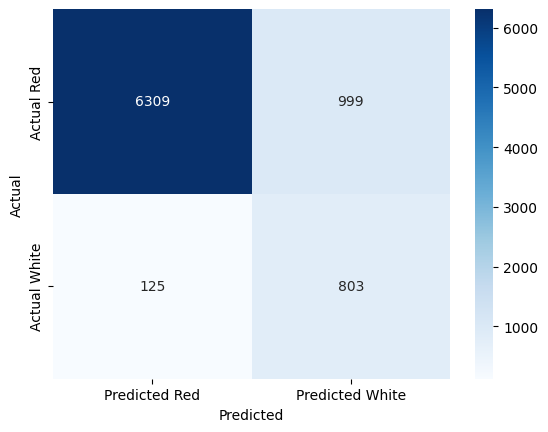

In [75]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues' , xticklabels=['Predicted Red', 'Predicted White'], yticklabels=['Actual Red', 'Actual White'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [76]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model_core_pipeline, X, Y, cv=cv)
print(scores)
print("Mean Accuracy:", scores.mean())

[0.8703254  0.86326655 0.86873103 0.86375228 0.86363084]
Mean Accuracy: 0.8659412185695038


In [77]:
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.8633004926108374


In [78]:
Y_prob = model_core_pipeline.predict_proba(X_test)[:,1]

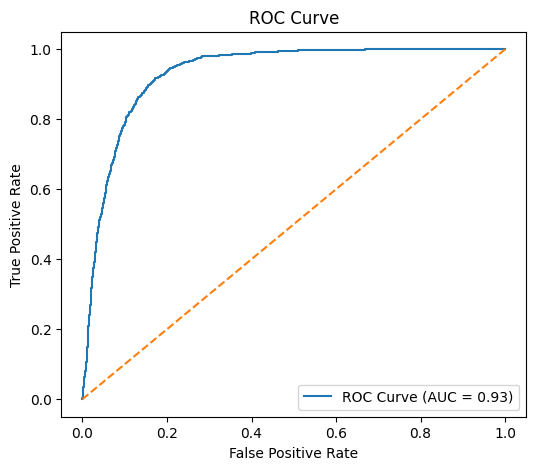

In [79]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)

auc = roc_auc_score(Y_test, Y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()